In [4]:
!pip install pyarrow


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Users\TechCare\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


# 1. PRODUCT FEATURES


## 1.1 Import data and change the column's name

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
# Install pyarrow package
%pip install pyarrow

# Load the Parquet file into a DataFrame using pyarrow engine
file_path = r"C:\Users\TechCare\OneDrive - HvA\Master - Block 1\Business Statistics\Team assignment\Tao Yin_Item_features.parquet"
df_taoyin_features = pd.read_parquet(file_path)


   ---------------------------------------- 0.0/25.1 MB ? eta -:--:--
   ----- ---------------------------------- 3.1/25.1 MB 15.3 MB/s eta 0:00:02
   ---------- ----------------------------- 6.3/25.1 MB 15.4 MB/s eta 0:00:02
   --------------- ------------------------ 9.7/25.1 MB 15.5 MB/s eta 0:00:01
   -------------------- ------------------- 12.8/25.1 MB 15.2 MB/s eta 0:00:01
   ------------------------- -------------- 16.0/25.1 MB 15.0 MB/s eta 0:00:01
   ------------------------------ --------- 19.4/25.1 MB 15.5 MB/s eta 0:00:01
   ----------------------------------- ---- 22.5/25.1 MB 15.3 MB/s eta 0:00:01
   ---------------------------------------  24.9/25.1 MB 15.2 MB/s eta 0:00:01
   ---------------------------------------- 25.1/25.1 MB 13.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
#change the name of column
df_taoyin_features.rename(columns={"statistiek_hoofdgroep": "main_group", "statistiek_subgroep": "sub_group", "Articlenr": "articlenr"}, inplace=True)
df_taoyin_features.head(5)

,articlenr,EF000001,EF000002,EF000003,EF000004,EF000005,EF000006,EF000007,EF000008,EF000010,...,EFDE0031,EFDE0032,EFFR0001,EFFR0002,EFNL0014,EFUK0017,EFUK0019,ETIM,main_group,sub_group
0,34581962,6.0,NaN,NaN,NaN,NaN,NaN,NaN,6.2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.0,A,x1
1,35764300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.0,A,x2
2,35823358,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.0,A,x3
3,28405226,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,321.0,B,y1
4,35622440,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,C,y2


### Dataset
- articlenr: product article number 
- From EF000001 to EFUK0019: Features of each products that can have such as colors, texture,...
- ETIM: the score of each article number 
- Main_group: group family: A, B, C, D, E, F, G, H
- Sub_group: small group in each group family

## Clean data and Descriptive analyses:  

In [10]:
#replace NaN value:
df_new_taoyin_features = df_taoyin_features.fillna(0)
df_new_taoyin_features.head()

,articlenr,EF000001,EF000002,EF000003,EF000004,EF000005,EF000006,EF000007,EF000008,EF000010,...,EFDE0031,EFDE0032,EFFR0001,EFFR0002,EFNL0014,EFUK0017,EFUK0019,ETIM,main_group,sub_group
0,34581962,6.0,0.0,0.0,0.0,0.0,0.0,0.0,6.2,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26.0,A,x1
1,35764300,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0,A,x2
2,35823358,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31.0,A,x3
3,28405226,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,321.0,B,y1
4,35622440,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,C,y2


In [12]:
#Reading the data 
TY_new_length = len(df_new_taoyin_features)
print("The length of the dataframe is: ", TY_new_length)

The length of the dataframe is:  168939


In [13]:
#information about the dataframe:
df_new_taoyin_features.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168939 entries, 0 to 168938
Columns: 4028 entries, articlenr to sub_group
dtypes: float64(4025), int64(1), object(2)
memory usage: 5.1+ GB


In [ ]:
#check the nan values in the dataframe


In [27]:
#count the duplicate in TaoYin_features: - by rows:
count_duplicate = df_new_taoyin_features.duplicated().sum()
print(count_duplicate)

258


In [30]:
#the percentage of duplicate:
#Total number of rows in the Dataset:
total_rows = df_new_taoyin_features.shape[0]

#calculate the percentage of duplicate row:
percentage_duplicate = (count_duplicate / total_rows) * 100
#print percentage:
print(percentage_duplicate)

0.15271784490259796


because the row is similar with value  so we drop the duplicate the 

            Articlenr
main_group           
A               39442
B               13280
C              100049
D                7955
E                1354
F                5151
G                 434
H                1220
I                  54


<Figure size 1000x600 with 0 Axes>

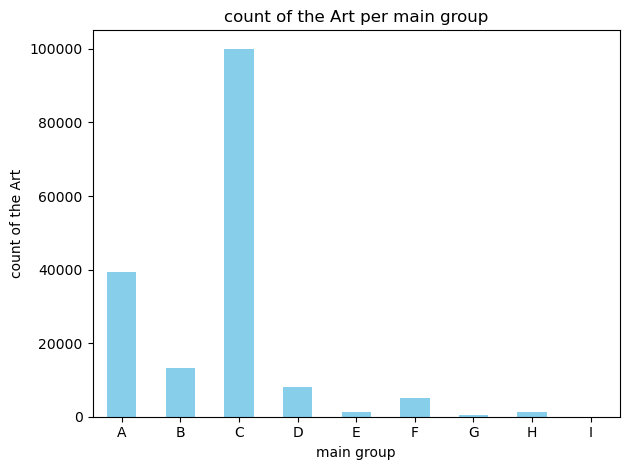

In [ ]:
#pivot_table_statistiek_hoofdgroep
pivot_groups = df_taoyin_features.pivot_table(index= ["main_group"], values = ["Articlenr"], aggfunc= "count")
print(pivot_groups)
#draw the bar chart:
plt.figure(figsize= (10,6))
pivot_groups.plot(kind= "bar", legend=False, color = 'skyblue')
#name of the chart
plt.title("count of the Art per main group")
plt.ylabel("count of the Art")
plt.xlabel("main group")
plt.xticks(rotation = 0)
plt.tight_layout()

#show the bar chart
plt.show()


In [ ]:
pivot_subgroup = df_taoyin_features.pivot_table(index= ["main_group", "sub_group"], values = ["Articlenr"], aggfunc= "count")
#tranfer to dataframe:
df_pivot_subgroup = pivot_subgroup.reset_index()
print(df_pivot_subgroup)

   main_group sub_group  Articlenr
0           A        p5         21
1           A        s4        362
2           A        u1      17599
3           A        u3      13143
4           A        v1       1941
5           A        x1       4169
6           A        x2       1295
7           A        x3        912
8           B        q2         52
9           B        r1       1844
10          B        v2          2
11          B        v3       1190
12          B        w3       1482
13          B        x4         68
14          B        y1       8434
15          B        y4        208
16          C        t4        699
17          C        u2      27150
18          C        u4        573
19          C        y2      14979
20          C        y3      37351
21          C        z1       9177
22          C        z2       8602
23          C        z4       1518
24          D        r2        956
25          D        s1       1059
26          D        z3       5940
27          E       

# TAO YIN TRANSACTION


## IMPPORT DATA


In [1]:
#load the parquet file - TaoYin transaction:
import pandas as pd
file_path_2= r"C:\Users\TechCare\OneDrive - HvA\Master - Block 1\Business Statistics\Team assignment\TaoYin_User_Transactions_v2.parquet"
df_taoyin_transaction = pd.read_parquet(file_path_2)
#display the dataset
df_taoyin_transaction.head()

,customer,invoice,invoice_date,articlenr,volume,sum1,sum2,postcode_delivery,postcode_customer,channel
0,2284,1187467,2020-01-02,32879960,24,343.73,362.30,80413,80413,Tel 86041
1,2284,1187467,2020-01-02,32879962,60,1067.64,1119.96,80413,80413,Tel 86041
2,2284,1187467,2020-01-02,32841810,120,2214.00,2408.40,80413,80413,Tel 86041
3,1704,1191447,2020-01-17,36866802,1,21.52,19.32,81724,81724,OTC 81812
4,45,1187691,2020-01-03,34360272,4,28.91,28.49,81796,81796,Web Order


In [2]:
#calculate the percentage of missing value in the dataset:
#count the missing value in the dataset:
missing_value = df_taoyin_transaction.isnull().sum()
print(missing_value)

customer             0
invoice              0
invoice_date         0
articlenr            0
volume               0
sum1                 0
sum2                 0
postcode_delivery    0
postcode_customer    0
channel              0
dtype: int64


In [4]:
#the table of containing sum of sum1 of each channel:
sum_channels = df_taoyin_transaction.pivot_table(index= ["channel"], values = ["sum1"], aggfunc= "sum")
print(sum_channels)


                        sum1
channel                     
ERP Order        67167614.17
MobileApp Order    605999.72
OTC 81812          525019.30
OTC 83047          643468.72
OTC 84817           70069.29
OTC 85705          192049.17
OTC 86041          840203.27
OTC 87324            3578.69
OTC 87547          623275.26
OTC 89206         3032934.88
Others               1037.86
Tel 81812         6090908.04
Tel 83047         2650309.45
Tel 84817         4054736.92
Tel 85705         3559189.33
Tel 86041         4314916.23
Tel 87324           23053.41
Tel 87547         1579144.55
Tel 89206         3864932.44
Web Order        14669661.31


<Figure size 1000x600 with 0 Axes>

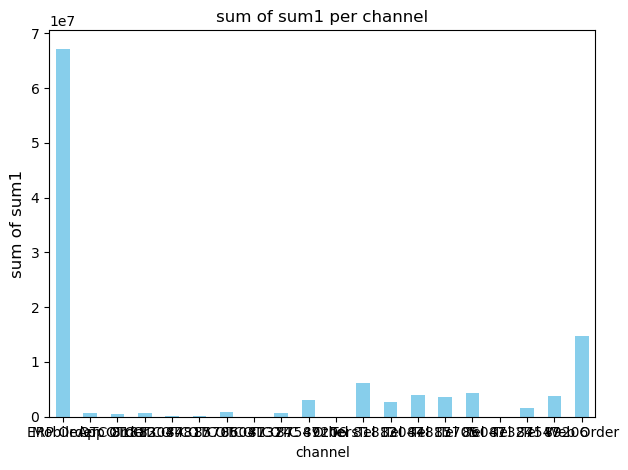

In [16]:
#draw the bar chart about the sum_channels:
plt.figure(figsize= (10,6))
sum_channels.plot(kind= "bar", legend=False, color = 'skyblue')
#name of the chart
plt.title("sum of sum1 per channel")
plt.ylabel("sum of sum1", fontsize = 12)
plt.xlabel("channel")
plt.xticks(rotation = 0)
plt.tight_layout()

# Show the plot
plt.show()



In [14]:
#The table of sum per year
#spin the year from the date column:
df_taoyin_transaction["year"] = df_taoyin_transaction["invoice_date"].dt.year
#the dataset after adding the year column:
sum_year = df_taoyin_transaction.pivot_table(index= ["year"], values = ["sum1"], aggfunc= "sum")
#display the dataset:
sum_year.head()

,sum1
year,
2020,13505720.30
2021,65291275.72
2022,14476351.80
2023,13679932.56
2024,7558821.63


<Figure size 1000x600 with 0 Axes>

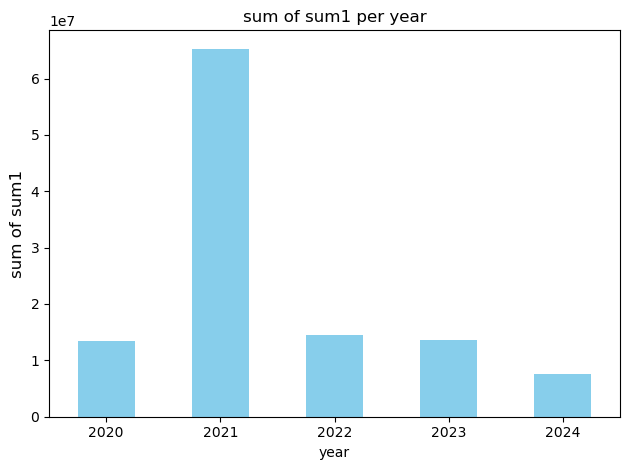

In [ ]:
#draw the bar chart about the sum_year:
plt.figure(figsize= (10,6))
sum_year.plot(kind= "bar", legend=False, color = 'skyblue')
#name of the chart
plt.title("sum of sum1 per year")
plt.ylabel("sum of sum1", fontsize = 12)
plt.xlabel("year")
plt.xticks(rotation = 0)
plt.tight_layout()
#show the bar chart
plt.show()


Based on the graph, we observe that during 2021, the sum of products increased dramatically due to COVID-19, but dropped significantly afterward.

- **R1:** Analyzing the entire timeframe includes numerous outliers, which could distort insights and affect other variables.
  
- **R2:** Given that the project aims to identify product segments for targeted production and upselling to business customers, focusing on the post-COVID period is essential. Including the full timeframe could lead to skewed insights and misguided decisions. For instance, while face masks saw high demand during COVID, this demand sharply declined afterward, making it an unreliable indicator for future strategy.

### Explaination
- Firstly, I drop the row during 2020 and 2021

In [19]:
#new_df with filter the row of the df_taoyin_transaction have invoice_data from 2022-01-01 to after that:
TY_2022 = df_taoyin_transaction[df_taoyin_transaction['invoice_date'] > '2022-01-01']
TY_2022.head()

,customer,invoice,invoice_date,articlenr,volume,sum1,sum2,postcode_delivery,postcode_customer,channel,year
19831,1582,1369953,2022-01-06,34207712,2,11.84,11.5,84824,84824,Tel 84817,2022
19832,2256,1369969,2022-01-06,27200342,3050,1342.00,1707.7,85084,85084,Tel 84817,2022
19833,2256,1369969,2022-01-06,37069504,300,1725.00,2031.0,85084,85084,Tel 84817,2022
19834,727,1369982,2022-01-06,34659976,20,1797.00,4113.0,85341,85341,Tel 85705,2022
19835,727,1369982,2022-01-06,34605460,20,129.60,279.9,85341,85341,Tel 85705,2022


In [20]:
#create new df_price with the column: Articlenr, volumn, sum1, volumn
df_price = TY_2022[["articlenr", "volume", "sum1"]]
df_price.head()

,articlenr,volume,sum1
19831,34207712,2,11.84
19832,27200342,3050,1342.00
19833,37069504,300,1725.00
19834,34659976,20,1797.00
19835,34605460,20,129.60


In [21]:
#create the sum of the price of each article:
df_price = df_price.groupby("articlenr").sum()
df_price.head()

,volume,sum1
articlenr,,
21287380,1,515.00
21960000,2579,20592.25
21960002,19,165.09
21960004,2004,1719.73
21960008,775,687.25


In [22]:
#calculate the average price of each article:
df_price["price"] = round(df_price["sum1"] / df_price["volume"],2)
df_price.head()

,volume,sum1,price
articlenr,,,
21287380,1,515.00,515.00
21960000,2579,20592.25,7.98
21960002,19,165.09,8.69
21960004,2004,1719.73,0.86
21960008,775,687.25,0.89


Joining column sum1 and price from df_price with TaoYin_features dataset:


Sum 1 is the cost of product


In [31]:
#join the df_price (only volume and price column) with the df_taoyin_features:
df_TY_new = df_new_taoyin_features.merge(df_price, on = "articlenr", how = "left")
df_TY_new.head()

,articlenr,EF000001,EF000002,EF000003,EF000004,EF000005,EF000006,EF000007,EF000008,EF000010,...,EFFR0002,EFNL0014,EFUK0017,EFUK0019,ETIM,main_group,sub_group,volume,sum1,price
0,34581962,6.0,0.0,0.0,0.0,0.0,0.0,0.0,6.2,0.0,...,0.0,0.0,0.0,0.0,26.0,A,x1,NaN,NaN,NaN
1,35764300,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,30.0,A,x2,NaN,NaN,NaN
2,35823358,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,31.0,A,x3,NaN,NaN,NaN
3,28405226,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,321.0,B,y1,NaN,NaN,NaN
4,35622440,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,14.0,C,y2,NaN,NaN,NaN


In [32]:
#reduce the row with the price is NaN:
df_TY_new = df_TY_new[df_TY_new["price"].notnull()]

In [14]:
print(df_TY_new.shape)
df_TY_new.head()

(6107, 4031)


,articlenr,EF000001,EF000002,EF000003,EF000004,EF000005,EF000006,EF000007,EF000008,EF000010,...,EFFR0002,EFNL0014,EFUK0017,EFUK0019,ETIM,main_group,sub_group,volume,sum1,price
6,35785664,0.0,0.0,25.0,0.0,0.0,0.0,26.0,8.2,0.0,...,0.0,0.0,0.0,0.0,145.0,C,z1,90.0,93.62,1.04
38,35016688,0.0,0.0,182.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,16.0,C,y3,8.0,876.18,109.52
49,35700054,0.0,0.0,25.0,0.0,0.0,0.0,26.0,6.2,0.0,...,0.0,0.0,0.0,0.0,145.0,C,z1,958.0,1111.79,1.16
91,35832250,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,82.0,C,u2,2.0,106.47,53.24
164,29641848,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2334.0,...,0.0,0.0,0.0,0.0,319.0,B,y1,19.0,1890.42,99.50


## Test data:
- check null value by row: 
- check null value by column Cloumn nào cũng có giá trị hết, không có column nào đều là null value
- if null value is 100% -> remove the column 
- step 1: tìm các cột có nhiều giá trị NaN, chứa bao nhiêu % Nan
- step 2: PCA,.....
- Step 3: Công thức toán học, trung bị(Mean, Average)....

In [ ]:
#check columns from column 1 to 4025 in new , which columns have all the value in this columns is 0:
# Check columns from column 1 to 4025 in df_new_taoyin_features, which columns have all the values as 0
columns_all_zero = df_new_taoyin_features.iloc[:, 1:4026].columns[(df_new_taoyin_features.iloc[:, 1:4026] == 0).all()]
print(columns_all_zero)

Index([], dtype='object')


### DEVIDE PER GROUP - sample version PCA 

In [ ]:
#group A
product_groupA = df_new_taoyin_features[df_new_taoyin_features["main_group"] == "A"]
product_groupA.head(5)

,Articlenr,EF000001,EF000002,EF000003,EF000004,EF000005,EF000006,EF000007,EF000008,EF000010,...,EFDE0031,EFDE0032,EFFR0001,EFFR0002,EFNL0014,EFUK0017,EFUK0019,ETIM,main_group,sub_group
0,34581962,6.0,0.0,0.0,0.0,0.0,0.0,0.0,6.2,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26.0,A,x1
1,35764300,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0,A,x2
2,35823358,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31.0,A,x3
13,34300312,0.0,0.0,0.0,0.0,0.0,0.0,148.0,0.0,269.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,164.0,A,u1
29,34649896,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52.0,A,u3


In [ ]:
#total_row Group A
sum_rows_A = product_groupA.shape[0]
print(sum_rows_A)

39442


In [ ]:
#check duplicate in group A
count_duplicate_A = product_groupA.duplicated().sum()
print(count_duplicate_A)


9


In [ ]:
#remove the duplicate row in group A
new_groupA = product_groupA.drop_duplicates()
print(new_groupA.shape[0])
print(new_groupA.shape[1])
new_groupA.head()

39433
4028


,Articlenr,EF000001,EF000002,EF000003,EF000004,EF000005,EF000006,EF000007,EF000008,EF000010,...,EFDE0031,EFDE0032,EFFR0001,EFFR0002,EFNL0014,EFUK0017,EFUK0019,ETIM,main_group,sub_group
0,34581962,6.0,0.0,0.0,0.0,0.0,0.0,0.0,6.2,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26.0,A,x1
1,35764300,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0,A,x2
2,35823358,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31.0,A,x3
13,34300312,0.0,0.0,0.0,0.0,0.0,0.0,148.0,0.0,269.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,164.0,A,u1
29,34649896,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52.0,A,u3


In [ ]:
#check missing value in group A:
missing_value_A = new_groupA.isnull().sum()


In [ ]:
#print the missing value in group A:
print(missing_value_A)

Articlenr     0
EF000001      0
EF000002      0
EF000003      0
EF000004      0
             ..
EFUK0017      0
EFUK0019      0
ETIM          0
main_group    0
sub_group     0
Length: 4028, dtype: int64


In [ ]:
#check the type of data in group A:
data_type_A = new_groupA.dtypes
#print the data type:
print(data_type_A)

Articlenr       int64
EF000001      float64
EF000002      float64
EF000003      float64
EF000004      float64
               ...   
EFUK0017      float64
EFUK0019      float64
ETIM          float64
main_group     object
sub_group      object
Length: 4028, dtype: object


PCA METHOD 1:
1. STEP 1: group columns base on their prefixes (because if we use 4000 columns is so large)
2. STEP 2: Aggregate the columns within each group by summing them (Tổng hợp các cột trong mỗi nhóm bằng cách cộng chúng lại)
3. STEP 3: Finding the principal components (remain 85% variance )


In [ ]:
# Step 1: Group columns based on their prefixes
prefixes = ['EF0', 'EFDE', 'EFFR', 'EFNL', 'EFUK']
grouped_columns = {prefix: [col for col in new_groupA.columns if col.startswith(prefix)] for prefix in prefixes}

# Step 2: Aggregate the columns within each group by summing them
aggregated_data = pd.DataFrame(index=new_groupA.index)
for prefix, columns in grouped_columns.items():
    aggregated_data[prefix] = new_groupA[columns].sum(axis=1)


# Step 3: Standardize the aggregated data
scaler = StandardScaler()
scaled_aggregated_data = scaler.fit_transform(aggregated_data)

#print the scaled data:
print(scaled_aggregated_data)
aggregated_data.head()

[[-0.0142664  -0.03837989  0.          0.          0.        ]
 [-0.01427204 -0.03837989  0.          0.          0.        ]
 [-0.01426903 -0.03837989  0.          0.          0.        ]
 ...
 [-0.01426947 -0.03837989  0.          0.          0.        ]
 [-0.01426941 -0.03837989  0.          0.          0.        ]
 [-0.01424392 -0.03837989  0.          0.          0.        ]]


,EF0,EFDE,EFFR,EFNL,EFUK
0,2285.5,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0
2,1220.0,0.0,0.0,0.0,0.0
3,1820.0,0.0,0.0,0.0,0.0
4,2075.3,0.0,0.0,0.0,0.0


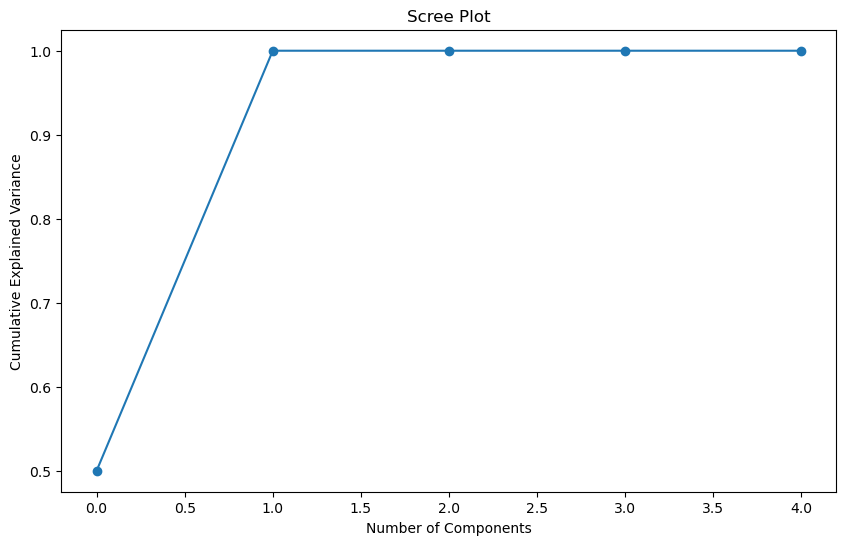

Number of components to retain 95% variance: 2


In [ ]:
# Step 4:  check the components of the scaled data

# Step 4.1: Fit PCA
pca = PCA()
pca.fit(scaled_aggregated_data)

# Step 4.2: Explained Variance
explained_variance = pca.explained_variance_ratio_

# Step 4.3: Scree Plot
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(explained_variance), marker='o', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot')
plt.show()

# Step 4.4: Choose number of components
# Retain 95% of the variance
cumulative_variance = np.cumsum(explained_variance)
n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1 #aggmax return the first occurrence of the maximum value

print(f'Number of components to retain 95% variance: {n_components_95}')



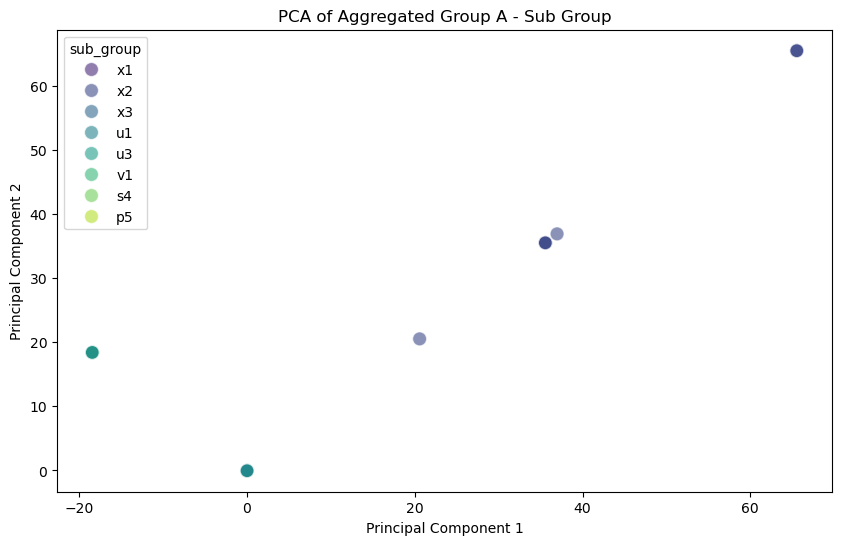

In [ ]:
# Step 5: Create a DataFrame with the principal components
pca_df = pd.DataFrame(data=pca.transform(scaled_aggregated_data)[:, :n_components_95], 
					  columns=[f'Principal Component {i+1}' for i in range(n_components_95)])

# Add the main_group and sub_group columns for visualization
pca_df['main_group'] = new_groupA['main_group']
pca_df['sub_group'] = new_groupA['sub_group']
pca_df["Articlenr"] = new_groupA["Articlenr"]

# Step 6: Visualize the results
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Principal Component 1', y='Principal Component 2', hue='sub_group', data=pca_df, palette='viridis', s=100, alpha=0.6)
plt.title("PCA of Aggregated Group A - Sub Group")
plt.show()

In [ ]:
#print demo of the dataframe pca_df
pca_df.head()

,Principal Component 1,Principal Component 2,main_group,sub_group,Articlenr
0,0.017051,-0.037227,A,x1,34581962
1,0.017047,-0.037231,A,x2,35764300
2,0.017049,-0.037228,A,x3,35823358
3,0.017050,-0.037227,A,u1,34300312
4,0.017050,-0.037227,A,u3,34649896


PCA METHOD 2
1. Remain 4000 columns -> finding the number of components with at least 60% (variance)



In [ ]:
# Step 1: Standardize the numeric data
# Exclude 'Articlenr' from the numeric columns
numeric_columns_A = new_groupA.select_dtypes(include=[np.number]).columns.difference(['Articlenr'])

# Standardize the numeric data
scaler_A2 = StandardScaler()
scaled_data_A2 = scaler_A.fit_transform(new_groupA[numeric_columns_A])


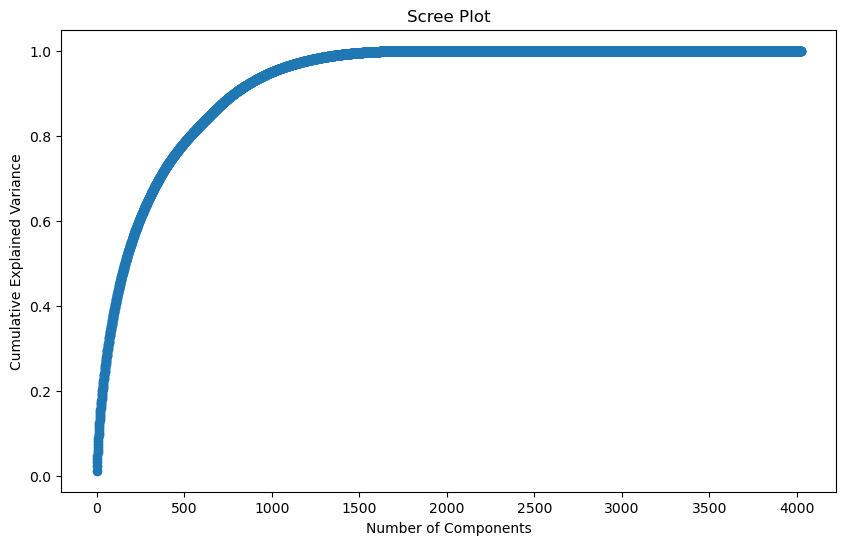

Number of components to retain 60% variance: 244


In [ ]:
#Step 2: check the components of the scaled data
# Step 2.1: Fit PCA
pca_A2 = PCA()
pca_A2.fit(scaled_data_A2)
# Step 2.2: Explained Variance
explained_variance_A2 = pca_A2.explained_variance_ratio_
# Step 2.3: Scree Plot
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(explained_variance_A2), marker='o', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot')
plt.show()
# Step 2.4: Choose number of components
# Retain 60% of the variance
cumulative_variance_A2 = np.cumsum(explained_variance_A2)
n_components_60_A2 = np.argmax(cumulative_variance_A2 >= 0.60) + 1
print(f'Number of components to retain 60% variance: {n_components_60_A2}')


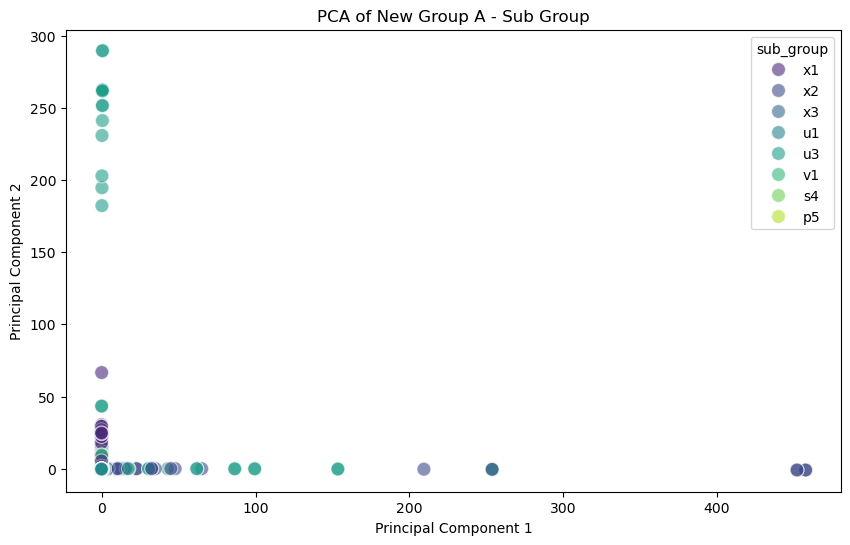

(39433, 247)


,Principal Component 1,Principal Component 2,Principal Component 3,Principal Component 4,Principal Component 5,Principal Component 6,Principal Component 7,Principal Component 8,Principal Component 9,Principal Component 10,...,Principal Component 238,Principal Component 239,Principal Component 240,Principal Component 241,Principal Component 242,Principal Component 243,Principal Component 244,main_group,sub_group,Articlenr
0,-0.120118,-0.232283,-0.267304,-0.578253,-0.387256,-0.061795,-0.003097,0.161999,-0.251066,-0.275192,...,-0.185727,-0.131596,-0.179179,0.042613,0.602243,0.670176,-0.165227,A,x1,34581962
1,-0.095782,-0.173258,-0.179090,-0.400365,-0.249761,-0.053919,0.004227,0.102392,-0.160483,-0.154863,...,0.054099,0.152869,-0.039007,-0.136088,-0.076834,-0.072519,0.019363,A,x2,35764300
2,-0.199673,-0.453689,-0.508290,0.785099,-2.301942,-0.309132,-1.530174,-6.090330,7.009378,5.543461,...,-0.038886,-0.014185,0.022196,-0.021311,0.015776,-0.058871,-0.035967,A,x3,35823358
3,-0.124882,-0.239824,-0.297733,-0.677710,-0.237061,-0.065209,0.012451,0.485603,-0.582397,-0.797700,...,0.658918,0.282247,0.034471,-0.723617,-0.411472,-0.010119,0.592040,A,u1,34300312
4,-0.222544,-0.504382,-0.571833,1.121997,-2.635454,-0.361898,-1.843333,-7.334908,8.457960,6.660062,...,-0.011455,-0.008499,0.090957,0.077494,0.085626,0.007427,0.140236,A,u3,34649896


In [ ]:
# Step 3: Apply PCA
pca_A = PCA(n_components=n_components_60_A2) 
principal_components_A2 = pca_A.fit_transform(scaled_data_A2)

# Step 4: Create a DataFrame with the principal components
pca_df_A2 = pd.DataFrame(data=principal_components_A2, 
                        columns=[f'Principal Component {i+1}' for i in range(n_components_60_A2)])

# Ensure the indices match before adding the original columns
pca_df_A2 = pca_df_A2.reset_index(drop=True) # Reset the index to avoid issues when concatenating the DataFrames
new_groupA = new_groupA.reset_index(drop=True) # Reset the index to avoid issues when concatenating the DataFrames

# Add the main_group and sub_group columns for visualization
pca_df_A2['main_group'] = new_groupA['main_group']
pca_df_A2['sub_group'] = new_groupA['sub_group']
pca_df_A2["Articlenr"] = new_groupA["Articlenr"]

# Step 5: Visualize the results
# Visualize by the sub_group
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Principal Component 1', y='Principal Component 2', hue='sub_group', data=pca_df_A2, palette='viridis', s=100, alpha=0.6)  # s is the size of the dots, alpha is the transparency
plt.title("PCA of New Group A - Sub Group")
plt.show()

# Step 6: Check the shape of the pca_df

# Print the number of rows and columns of pca_df_A:
print(pca_df_A2.shape)

# Print the DataFrame with the principal components
pca_df_A2.head()

In [ ]:

product_groupE = df_new_taoyin_features.loc[df_new_taoyin_features["main_group"] == "E"]

product_groupE.head(5)

,Articlenr,EF000001,EF000002,EF000003,EF000004,EF000005,EF000006,EF000007,EF000008,EF000010,...,EFDE0031,EFDE0032,EFFR0001,EFFR0002,EFNL0014,EFUK0017,EFUK0019,ETIM,main_group,sub_group
46,36405118,0.0,0.0,0.0,0.0,0.0,0.0,0.0,500.0,1242.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,359.0,E,v2
183,36865158,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,889.0,E,s3
266,36404602,0.0,0.0,7.0,0.0,0.0,0.0,48.0,1300.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,361.0,E,v2
307,32214958,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,366.0,E,t3
489,36400140,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,452.0,E,v2


In [ ]:
#check duplicate in group E
count_duplicate_E = product_groupE.duplicated().sum()
print(count_duplicate_E)

0


Before we run all data, we will test the PCA analysis with sample data. In this dataset, we have 4028 columns 
1. Sample data from group E -> check the PCA analysis

In [ ]:
#sample E - demo model
sample_groupE = product_groupE.sample(n = 300, random_state= 47).reset_index(drop=True)
sample_groupE.head()

,Articlenr,EF000001,EF000002,EF000003,EF000004,EF000005,EF000006,EF000007,EF000008,EF000010,...,EFDE0031,EFDE0032,EFFR0001,EFFR0002,EFNL0014,EFUK0017,EFUK0019,ETIM,main_group,sub_group
0,36402160,0.0,0.0,0.0,0.0,0.0,0.0,0.0,500.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,359.0,E,v2
1,36402136,0.0,0.0,0.0,0.0,0.0,0.0,0.0,500.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,359.0,E,v2
2,36404914,0.0,0.0,7.0,0.0,0.0,0.0,4.0,1300.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,361.0,E,v2
3,35721960,0.0,0.0,0.0,0.0,0.0,0.0,26.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45.0,E,t3
4,36404282,0.0,0.0,0.0,0.0,0.0,0.0,0.0,500.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,359.0,E,v2


From feedback: after PCA - clustering analysis - make a bridge to connect with Transaction dataset 

This process of performing Principal Component Analysis (PCA) on a sample dataset (sample_groupE) to reduce its dimensionality and visualize the results.
Steps:
1. Standardize the numeric data using StandardScaler. (without Articlenr column, sub_group and main_group column)
2. Apply PCA to reduce the data to 2 dimensions.
3. Create a DataFrame with the principal components.
4. Visualize the results using a scatter plot.

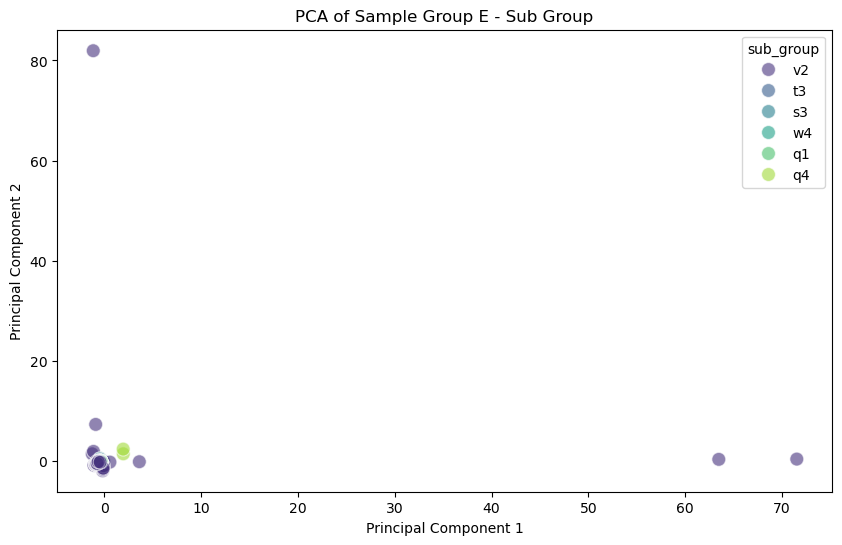

(300, 5)


,Principal Component 1,Principal Component 2,main_group,sub_group,Articlenr
0,-0.737031,-0.540958,E,v2,36402160
1,-0.814098,-0.616677,E,v2,36402136
2,-0.603505,-0.247541,E,v2,36404914
3,-0.306853,-0.174683,E,t3,35721960
4,-0.813143,-0.615375,E,v2,36404282


In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Step 1: Standardize the numeric data
# Exclude 'Articlenr' from the numeric columns
numeric_columns = sample_groupE.select_dtypes(include=[np.number]).columns.difference(['Articlenr']) #Do PCA on the numeric columns without the 'Articlenr' column

# Standardize the numeric data
scaler = StandardScaler() 
scaled_data = scaler.fit_transform(sample_groupE[numeric_columns]) #Fit and transform the numeric columns to the same scale


# Step 2: Apply PCA
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
principal_components = pca.fit_transform(scaled_data) #Fit and transform the scaled data to the principal components

# Step 3: Create a DataFrame with the principal components
pca_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])  

# Add the main_group and sub_group columns for visualization
pca_df['main_group'] = sample_groupE['main_group']
pca_df['sub_group'] = sample_groupE['sub_group']
#add the Articlenr column:
pca_df["Articlenr"] = sample_groupE["Articlenr"]

# Step 4: Visualize the results
#visualize by the sub_group
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Principal Component 1', y='Principal Component 2', hue='sub_group', data=pca_df, palette='viridis', s=100, alpha=0.6)  # s is the size of the dots, alpha is the transparency
plt.title("PCA of Sample Group E - Sub Group")
plt.show()

#Step 5: Check the shape of the pca_df
#print the number of rows and columns of pca_df:
print(pca_df.shape)
# Print the DataFrame with the principal components
pca_df.head()


Making PCA with all the dataset from group E
1. Note: Using the components = 2 

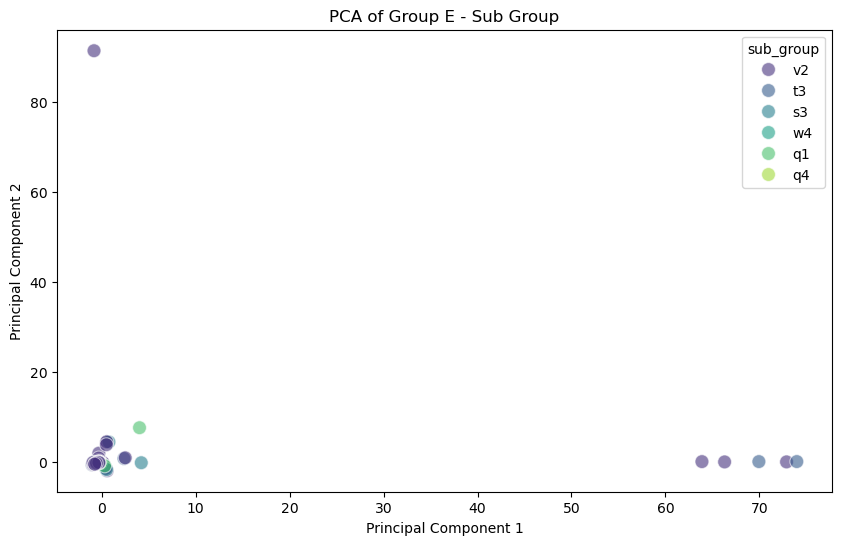

(1354, 5)


,Principal Component 1,Principal Component 2,main_group,sub_group,Articlenr
0,-0.730901,-0.423990,E,v2,36402160.0
1,-0.299709,-0.073581,E,v2,36402136.0
2,-0.612575,-0.293714,E,v2,36404914.0
3,-0.377630,-0.144514,E,t3,35721960.0
4,-0.297057,-0.109102,E,v2,36404282.0


In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Step 1: Standardize the numeric data
# Exclude 'Articlenr' from the numeric columns
numeric_columns_E = product_groupE.select_dtypes(include=[np.number]).columns.difference(['Articlenr']) #Do PCA on the numeric columns without the 'Articlenr' column

# Standardize the numeric data
scaler = StandardScaler() 
scaled_data_E = scaler.fit_transform(product_groupE[numeric_columns]) #Fit and transform the numeric columns to the same scale


# Step 2: Apply PCA
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
principal_components_E = pca.fit_transform(scaled_data_E) #Fit and transform the scaled data to the principal components

# Step 3: Create a DataFrame with the principal components
pca_df_E = pd.DataFrame(data=principal_components_E, columns=['Principal Component 1', 'Principal Component 2'])  

# Add the main_group and sub_group columns for visualization
pca_df_E['main_group'] = sample_groupE['main_group']
pca_df_E['sub_group'] = sample_groupE['sub_group']
pca_df_E["Articlenr"] = sample_groupE["Articlenr"]

# Step 4: Visualize the results
#visualize by the sub_group
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Principal Component 1', y='Principal Component 2', hue='sub_group', data=pca_df_E, palette='viridis', s=100, alpha=0.6)  # s is the size of the dots, alpha is the transparency
plt.title("PCA of Group E - Sub Group")
plt.show()

#Step 5: Check the shape of the pca_df
#print the number of rows and columns of pca_df:
print(pca_df_E.shape)
# Print the DataFrame with the principal components
pca_df_E.head()


Method 2: Finding the number of components retain 60% variance 
1. The number of components: 32 
2. Plot the data after doing PCA 

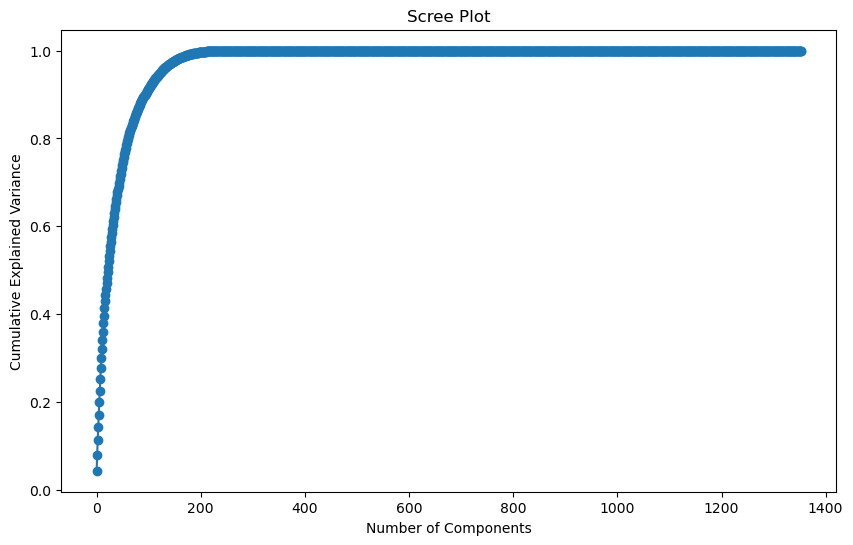

Number of components to retain 60% variance: 32


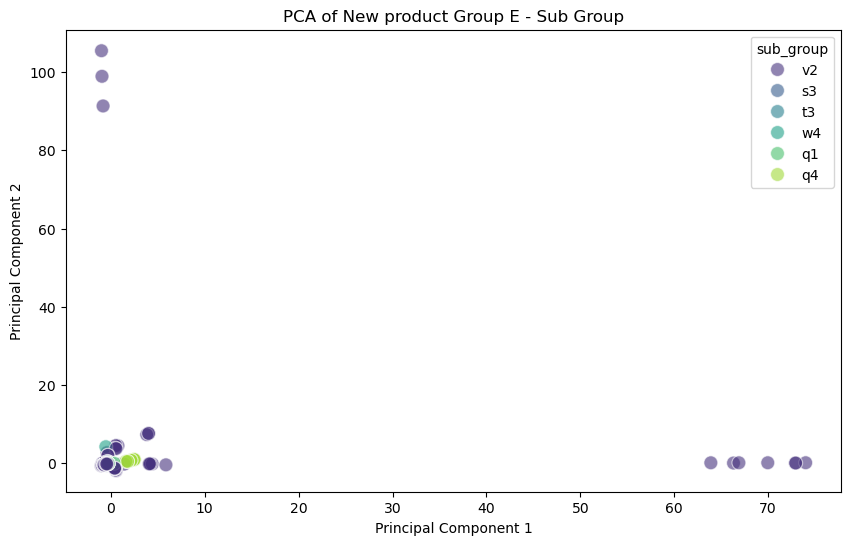

(1354, 35)


,Principal Component 1,Principal Component 2,Principal Component 3,Principal Component 4,Principal Component 5,Principal Component 6,Principal Component 7,Principal Component 8,Principal Component 9,Principal Component 10,...,Principal Component 26,Principal Component 27,Principal Component 28,Principal Component 29,Principal Component 30,Principal Component 31,Principal Component 32,main_group,sub_group,Articlenr
0,-0.730844,-0.418022,-1.791751,-2.140367,0.563024,-0.401582,-0.236465,0.242950,-0.651153,-3.546253,...,0.048867,-0.069962,0.047532,0.345052,-0.167375,0.107249,0.417801,E,v2,36405118
1,-0.299630,-0.074737,-0.464726,-0.318830,0.089419,-0.021131,-0.031119,-0.003049,0.035025,0.610012,...,-0.102867,0.005922,-0.110517,0.260174,-0.296851,-0.028484,0.394949,E,s3,36865158
2,-0.604367,-0.296072,-0.832403,1.154578,-1.498122,-0.851291,-0.978776,-0.562757,-0.113593,6.448613,...,0.218450,0.208206,-0.071690,-0.194269,0.238869,-0.093252,-0.711275,E,v2,36404602
3,-0.379496,-0.162523,-0.398710,-0.257722,0.149532,-0.050262,-0.115975,0.009128,0.063571,3.704636,...,-0.035327,0.349773,-0.520238,1.205237,-1.227565,-1.965580,5.166131,E,t3,32214958
4,-0.296999,-0.110388,-0.388076,-0.382247,0.119283,-0.003334,0.008001,-0.004341,0.024561,0.633026,...,-0.051804,0.217950,-0.009270,0.222909,-0.298566,-0.168780,0.463365,E,v2,36400140


In [ ]:
# Step 1: Standardize the numeric data
# Exclude 'Articlenr' from the numeric columns
numeric_columns_E2 = product_groupE.select_dtypes(include=[np.number]).columns.difference(['Articlenr'])

# Standardize the numeric data
scaler_E2 = StandardScaler()
scaled_data_E2 = scaler_E2.fit_transform(product_groupE[numeric_columns_E2])

# Step 2: Fit PCA
pca_E2 = PCA()
pca_E2.fit(scaled_data_E2)

# Step 3: Explained Variance
explained_variance_E2 = pca_E2.explained_variance_ratio_

# Step 4: Scree Plot
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(explained_variance_E2), marker='o', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot')
plt.show()

# Step 5: Choose number of components to retain 60% of the variance
cumulative_variance_E2 = np.cumsum(explained_variance_E2)
n_components_60_E2 = np.argmax(cumulative_variance_E2 >= 0.60) + 1

print(f'Number of components to retain 60% variance: {n_components_60_E2}')
# Step 6: Apply PCA with the chosen number of components
pca_E2 = PCA(n_components=n_components_60_E2)
principal_components_E2 = pca_E2.fit_transform(scaled_data_E)

# Step 7: Create a DataFrame with the principal components
pca_df_E2 = pd.DataFrame(data=principal_components_E2, 
                        columns=[f'Principal Component {i+1}' for i in range(n_components_60_E2)])

# Ensure the indices match before adding the original columns
pca_df_E2 = pca_df_E2.reset_index(drop=True)
product_groupE = product_groupE.reset_index(drop=True)

# Add the main_group and sub_group columns for visualization
pca_df_E2['main_group'] = product_groupE['main_group']
pca_df_E2['sub_group'] = product_groupE['sub_group']
pca_df_E2["Articlenr"] = product_groupE["Articlenr"]

# Step 8: Visualize the results
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Principal Component 1', y='Principal Component 2', hue='sub_group', data=pca_df_E2, palette='viridis', s=100, alpha=0.6)
plt.title("PCA of New product Group E - Sub Group")
plt.show()

# Step 9: Check the shape of the pca_df
print(pca_df_E2.shape)
pca_df_E2.head()

## TEST COMBINE GROUP FEATURES 


## TEST WITH GROUP E 
- RUN DROP THE COLUMNS CONTAIN NULL VALUE
- RUN WITH SMALL SCOPE

#### Group E with the old data set without price after 2022

In [ ]:
# Check columns from column 1 to 4025 in product_groupE, which columns have all the values as 0
columns_all_zero_E = product_groupE.iloc[:, 1:4026].columns[(product_groupE.iloc[:, 1:4026] == 0).all()]
print(columns_all_zero_E)


In [ ]:
#create the new df product E without the columns have all the value is 0:
p_E_new = product_groupE.drop(columns=columns_all_zero_E)
p_E_new.head()

,Articlenr,EF000001,EF000002,EF000003,EF000004,EF000005,EF000006,EF000007,EF000008,EF000010,...,EF025108,EF025109,EF025222,EF025340,EF025409,EF025560,EF026115,ETIM,main_group,sub_group
46,36405118,0.0,0.0,0.0,0.0,0.0,0.0,0.0,500.0,1242.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,359.0,E,v2
183,36865158,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,889.0,E,s3
266,36404602,0.0,0.0,7.0,0.0,0.0,0.0,48.0,1300.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,361.0,E,v2
307,32214958,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,366.0,E,t3
489,36400140,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,452.0,E,v2


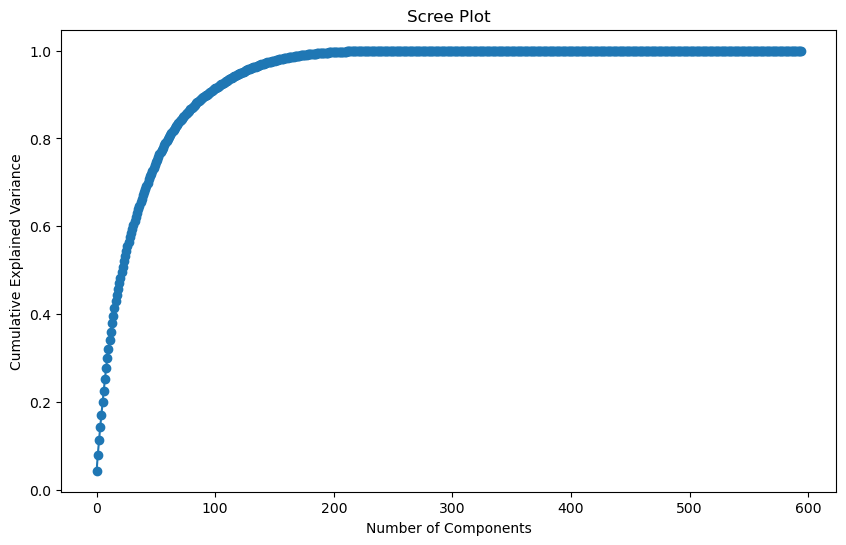

Number of components to retain 60% variance: 32


In [ ]:
#try to do PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Step 1: Standardize the numeric data
# Exclude 'Articlenr' from the numeric columns
numeric_columns_E = p_E_new.select_dtypes(include=[np.number]).columns.difference(['Articlenr'])

#step 2: Standardize the numeric data
scaler_E = StandardScaler()
scaled_data_E = scaler_E.fit_transform(p_E_new[numeric_columns_E])

#step 3: check the components of the scaled data
# Step 3.1: Fit PCA
pca_E = PCA()
pca_E.fit(scaled_data_E)

# Step 3.2: Explained Variance
explained_variance_E = pca_E.explained_variance_ratio_
# Step 3.3: Scree Plot
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(explained_variance_E), marker='o', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot')
plt.show()
# Step 3.4: Choose number of components
# Retain 60% of the variance
cumulative_variance_E = np.cumsum(explained_variance_E)
n_components_60_E = np.argmax(cumulative_variance_E >= 0.60) + 1
print(f'Number of components to retain 60% variance: {n_components_60_E}')




### Group E with new - dataframe TY_features_2022

In [22]:
#create group E from df_taoyin_features:
product_E2 = df_TY_new.loc[df_TY_new["main_group"] == "E"]
print(product_E2.shape)


(40, 4031)


In [ ]:
product_E2.head()

,articlenr,EF000001,EF000002,EF000003,EF000004,EF000005,EF000006,EF000007,EF000008,EF000010,...,EFFR0002,EFNL0014,EFUK0017,EFUK0019,ETIM,main_group,sub_group,volume,sum1,price
307,32214958,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,366.0,E,t3,70.0,11636.25,166.23
4637,36404106,0.0,0.0,0.0,0.0,0.0,0.0,48.0,55.0,0.0,...,0.0,0.0,0.0,0.0,459.0,E,v2,5.0,618.61,123.72
5689,36404586,0.0,0.0,7.0,0.0,0.0,0.0,48.0,900.0,0.0,...,0.0,0.0,0.0,0.0,361.0,E,v2,1.0,441.28,441.28
12642,36404480,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,20.0,E,v2,1.0,4.21,4.21
12918,36404582,0.0,0.0,0.0,0.0,0.0,0.0,0.0,500.0,1.0,...,0.0,0.0,0.0,0.0,359.0,E,v2,5.0,769.83,153.97


In [19]:
# Check columns from column 1 to 4025 in product_E2, which columns have all the values as 0
columns_all_zero_E2 = product_E2.iloc[:, 1:4026].columns[(product_E2.iloc[:, 1:4026] == 0).all()]
print(columns_all_zero_E2)


Index(['EF000001', 'EF000002', 'EF000004', 'EF000005', 'EF000006', 'EF000012',
       'EF000013', 'EF000014', 'EF000015', 'EF000016',
       ...
       'EFDE0003', 'EFDE0005', 'EFDE0025', 'EFDE0031', 'EFDE0032', 'EFFR0001',
       'EFFR0002', 'EFNL0014', 'EFUK0017', 'EFUK0019'],
      dtype='object', length=3891)


In [21]:
#remove the columns have all the value is 0:Pr
product_E2_new= product_E2.drop(columns=columns_all_zero_E2)
print(product_E2_new.shape)
product_E2_new.head()


(40, 140)


,articlenr,EF000003,EF000007,EF000008,EF000010,EF000025,EF000040,EF000041,EF000049,EF000076,...,EF024798,EF024836,EF025109,EF025340,ETIM,main_group,sub_group,volume,sum1,price
307,32214958,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,366.0,E,t3,70.0,11636.25,166.23
4637,36404106,0.0,48.0,55.0,0.0,0.0,55.0,0.0,22.0,0.0,...,1.0,0.0,0.0,0.0,459.0,E,v2,5.0,618.61,123.72
5689,36404586,7.0,48.0,900.0,0.0,0.0,630.0,0.0,57.0,0.0,...,0.0,0.0,1.0,0.0,361.0,E,v2,1.0,441.28,441.28
12642,36404480,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,20.0,E,v2,1.0,4.21,4.21
12918,36404582,0.0,0.0,500.0,1.0,0.0,0.0,1235.0,0.0,120.0,...,0.0,0.0,0.0,0.0,359.0,E,v2,5.0,769.83,153.97


In [ ]:
#transform the data set product_E2_new to the csv file:
product_E2_new.to_csv("product_E2_new.csv", index=False)
#change the directory to the file:
import os
os.chdir("C:\\Users\\TechCare\\OneDrive - HvA\\Master - Block 1\\Business Statistics\\Team assignment") #change the directory to the file, chdir is function to change directory

Doing PCA with product_E2_new


In [3]:
#improt the csv file:
product_E2_new = pd.read_csv("product_E2_new.csv")

In [4]:
#data type of the columns in product_E2_new:
data_type_E2 = product_E2_new.dtypes
print(data_type_E2)

articlenr       int64
EF000003      float64
EF000007      float64
EF000008      float64
EF000010      float64
               ...   
main_group     object
sub_group      object
volume        float64
sum1          float64
price         float64
Length: 140, dtype: object


In [5]:
#change the datatype of the columns articlenr to object:
product_E2_new["articlenr"] = product_E2_new["articlenr"].astype("object")

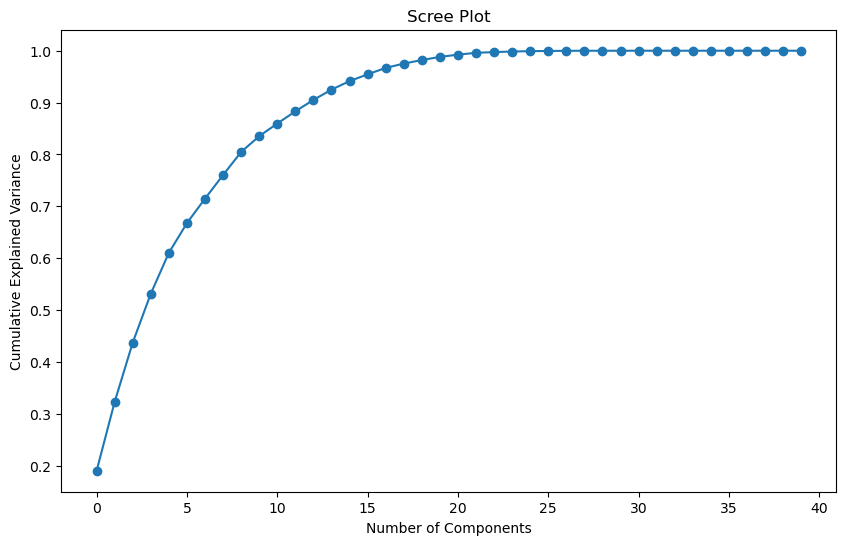

Number of components to retain 70% variance: 7


In [7]:
#step 1: Standardize the numeric data
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Exclude 'volumn', 'price', and 'sum1' from the numeric columns
numer_columns_E2 = product_E2_new.select_dtypes(include=[np.number]).columns.difference(['volume', 'price', 'sum1'])

#step 2: Standardize the numeric data
scaler_E2 = StandardScaler()
scaled_data_E2 = scaler_E2.fit_transform(product_E2_new[numer_columns_E2])

#step 3: check the components of the scaled data
# Step 3.1: Fit PCA
pca_E2 = PCA()
pca_E2.fit(scaled_data_E2)

# Step 3.2: Explained Variance
explained_variance_E2 = pca_E2.explained_variance_ratio_
# Step 3.3: Scree Plot
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(explained_variance_E2), marker='o', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot')
plt.show()

# Step 3.4: Choose number of components
# Retain 60% of the variance
cumulative_variance_E2 = np.cumsum(explained_variance_E2)
n_components_70_E2 = np.argmax(cumulative_variance_E2 >= 0.70) + 1
print(f'Number of components to retain 70% variance: {n_components_70_E2}')


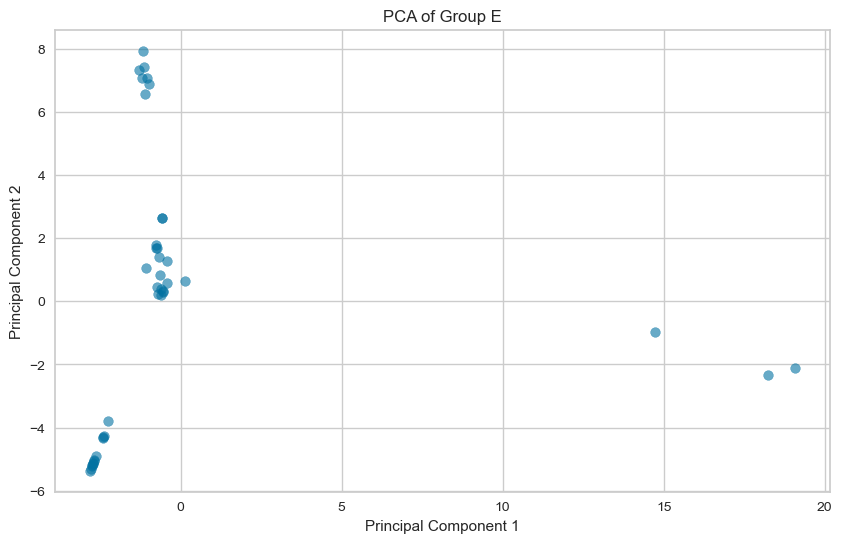

In [17]:
# Step 4: Apply PCA
pca_E2 = PCA(n_components=n_components_70_E2)
principal_components_E2 = pca_E2.fit_transform(scaled_data_E2)

# Step 5: Create a DataFrame with the principal components
pca_df_E2 = pd.DataFrame(data=principal_components_E2, 
                        columns=[f'PC{i+1}' for i in range(n_components_70_E2)])

# Ensure the columns exist and do not contain null values
required_columns = ["articlenr", "volume", "price", "sum1"]
for col in required_columns:
    if col not in product_E2_new.columns:
        raise ValueError(f"Column '{col}' not found in product_E2_new DataFrame")
    if product_E2_new[col].isnull().any():
        raise ValueError(f"Column '{col}' contains null values")

# Add the columns to the PCA DataFrame
pca_df_E2["articlenr"] = product_E2_new["articlenr"].values
pca_df_E2["volume"] = product_E2_new["volume"].values
pca_df_E2["price"] = product_E2_new["price"].values
pca_df_E2["sum1"] = product_E2_new["sum1"].values

# Step 6: plot the PCA result
plt.figure(figsize=(10, 6))
plt.scatter(pca_df_E2['PC1'], pca_df_E2['PC2'], alpha=0.6)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Group E')
plt.show()

In [9]:
#make a table with comparing the explained variance and the cumulative variance:
explained_variance_E2 = pca_E2.explained_variance_ratio_ # Explained variance of each principal component
cumulative_variance_E2 = np.cumsum(explained_variance_E2) # Cumulative explained variance
variance_df_E2 = pd.DataFrame({'Explained Variance': explained_variance_E2, 'Cumulative Variance': cumulative_variance_E2})
variance_df_E2.index = variance_df_E2.index + 1
variance_df_E2.index.name = 'Principal Component'
variance_df_E2.head(7)

,Explained Variance,Cumulative Variance
Principal Component,,
1,0.190087,0.190087
2,0.132936,0.323022
3,0.114283,0.437305
4,0.094346,0.531651
5,0.078740,0.610392
6,0.057253,0.667644
7,0.047153,0.714797


In [18]:
pca_df_E2.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,articlenr,volume,price,sum1
0,-0.727940,0.442016,0.932222,1.111993,2.132721,7.950966,10.794453,32214958,70.0,166.23,11636.25
1,19.072515,-2.111784,-1.634843,-0.322142,-0.838322,-0.931008,1.875038,36404106,5.0,123.72,618.61
2,-1.117322,6.574390,-3.478000,-1.302123,-1.903847,-1.041845,0.244905,36404586,1.0,441.28,441.28
3,-0.686374,0.243546,0.457984,0.808354,1.066710,2.724525,0.591821,36404480,1.0,4.21,4.21
4,-2.383450,-4.254590,-1.180649,-0.770246,-0.860787,-0.668864,-0.028885,36404582,5.0,153.97,769.83


### Cluster analysis - find the component feature with:
1. Hight features
2. Medium features
3. Low features

K - means

In [ ]:
# Install yellowbrick package
%pip install yellowbrick

   ---------------------------------------- 0.0/282.6 kB ? eta -:--:--
   ---------------------------------------- 0.0/282.6 kB ? eta -:--:--
   - -------------------------------------- 10.2/282.6 kB ? eta -:--:--
   -------- ------------------------------ 61.4/282.6 kB 812.7 kB/s eta 0:00:01
   ---------------------------------------  276.5/282.6 kB 2.4 MB/s eta 0:00:01
   ---------------------------------------- 282.6/282.6 kB 1.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [41]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

c:\Users\TechCare\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\TechCare\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\TechCare\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\TechCare\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory le

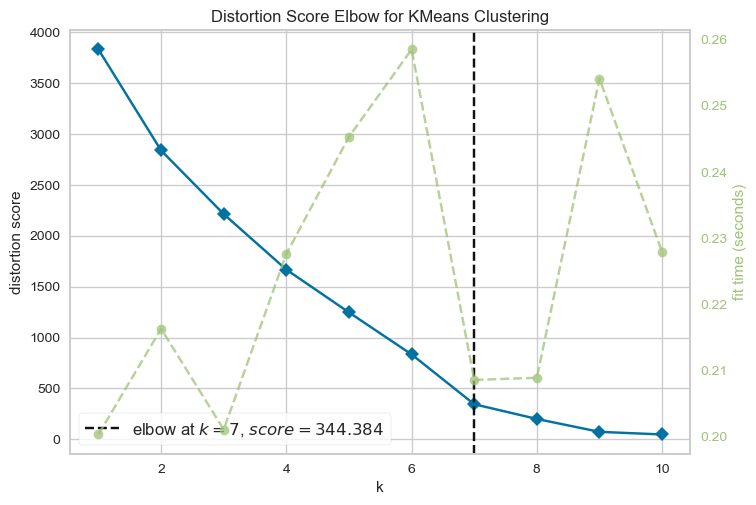

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [42]:
#model KMeans:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1, 11))

#plot
X_E2 = pca_df_E2[["PC1", "PC2", "PC3", "PC4", "PC5", "PC6", "PC7"]]

visualizer.fit(X_E2)
visualizer.show()


Look at the graph, we use k=6 

In [43]:
k = 6

model = KMeans(n_clusters=k , 
               init=   'k-means++',
               random_state= 1)

model.fit(X_E2)

c:\Users\TechCare\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=6, random_state=1)

In [44]:
pca_df_E2["cluster_product"] = model.predict(X_E2)


In [45]:
pca_df_E2.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,articlenr,volume,price,sum1,cluster,cluster_product
0,-0.727940,0.442016,0.932222,1.111993,2.132721,7.950966,10.794453,32214958,70.0,166.23,11636.25,0,0
1,19.072515,-2.111784,-1.634843,-0.322142,-0.838322,-0.931008,1.875038,36404106,5.0,123.72,618.61,2,2
2,-1.117322,6.574390,-3.478000,-1.302123,-1.903847,-1.041845,0.244905,36404586,1.0,441.28,441.28,1,1
3,-0.686374,0.243546,0.457984,0.808354,1.066710,2.724525,0.591821,36404480,1.0,4.21,4.21,0,0
4,-2.383450,-4.254590,-1.180649,-0.770246,-0.860787,-0.668864,-0.028885,36404582,5.0,153.97,769.83,3,3


In [53]:
#UNIQUE VALUES IN THE cluster and cluster_product
print(pca_df_E2["cluster_product"].unique())
print(pca_df_E2["cluster"].unique())

[0 2 1 3 4 5]
[0 2 1 3 4 5]


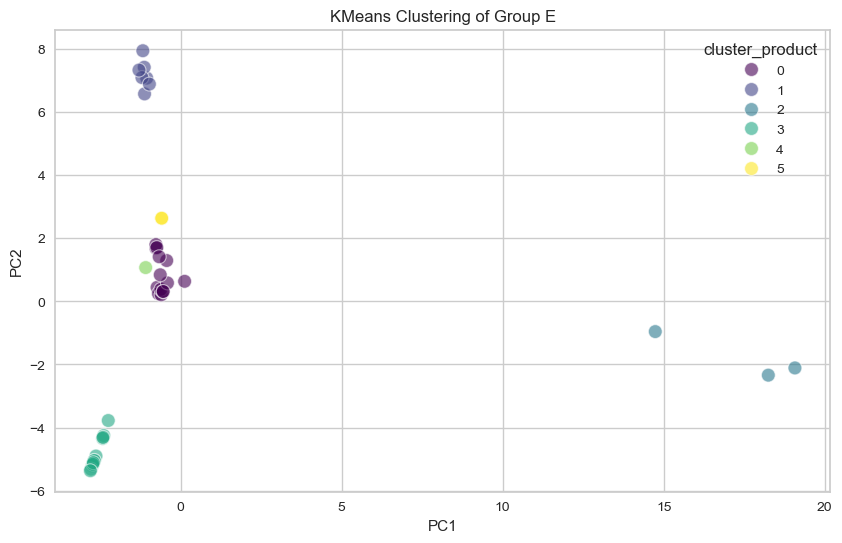

In [46]:
# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='cluster_product', data=pca_df_E2, palette='viridis', s=100, alpha=0.6)
plt.title('KMeans Clustering of Group E')
plt.show()


Gaussian Mixture Models 

In [47]:
# TODO: Apply your clustering algorithm of choice:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

In [48]:
#set a list of components in model:
n_GMMs = [2, 3, 4, 5, 6, 7, 8, 9, 10]

#run loops to get the silhouette score:

for n_GMM in n_GMMs:
    Clusterer = GaussianMixture(n_components = n_GMM, random_state= 1). fit(pca_df_E2)
    
    #predict the cluster for each data point
    preds = Clusterer.predict(pca_df_E2)
    
    #Find the cluster centres 
    centers = Clusterer.means_
    
    #calculate the mean silhouette score for the number of clusters chosen
    score = silhouette_score(pca_df_E2, preds)
    print(f"Silhouette score for {n_GMM} clusters: {score}")

c:\Users\TechCare\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Silhouette score for 2 clusters: 0.8999433710515703


c:\Users\TechCare\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Silhouette score for 3 clusters: 0.9143601413105639


c:\Users\TechCare\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Silhouette score for 4 clusters: 0.8063840140559968


c:\Users\TechCare\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Silhouette score for 5 clusters: 0.9472307910008443


c:\Users\TechCare\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Silhouette score for 6 clusters: 0.9099410628491524


c:\Users\TechCare\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\TechCare\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Silhouette score for 7 clusters: 0.8856285401043419
Silhouette score for 8 clusters: 0.8424201560692705


c:\Users\TechCare\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Silhouette score for 9 clusters: 0.8176566172768875
Silhouette score for 10 clusters: 0.772426877888899


c:\Users\TechCare\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Silhouette score for 5 clusters: 0.9472307910008443 - the highest silhouette => n_cluster = 5